In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'sample_submission.csv', 'data_description.txt']


In [2]:
data= pd.read_csv("../input/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

In [4]:
data.drop("Id",axis=1,inplace=True)


Deleting colmns having greater than 70% NaN values

In [5]:
del_nan_col=data.columns[data.isnull().sum()>100]
data.drop(list(del_nan_col),axis=1,inplace=True)

In [6]:
#columns which were deleted having greater than 100 nan values
del_nan_col

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [7]:
data.shape

(1460, 74)

In [8]:
#in a row there is a maximum of 10 missing values.
data.isnull().sum(axis=1).max()

10

In [9]:
#no of rows which have greater than 4 nan values
null_row=data[data.isnull().sum(axis=1)>4]
null_row.shape

(111, 74)

In [10]:
#droping rows having greater than 4 nan values
data.dropna(thresh=70,inplace=True)
data.shape
#1460-111=1349

(1349, 74)

In [11]:
#columns which are having null values
a=data.columns[data.isnull().any()]
a

Index(['MasVnrType', 'MasVnrArea', 'BsmtExposure', 'BsmtFinType2',
       'Electrical'],
      dtype='object')

In [12]:
#in those missing columns how many rows are missing
b=data.loc[:,list(a)]
b.isnull().sum()

MasVnrType      8
MasVnrArea      8
BsmtExposure    1
BsmtFinType2    1
Electrical      1
dtype: int64

In [13]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349 entries, 0 to 1459
Data columns (total 5 columns):
MasVnrType      1341 non-null object
MasVnrArea      1341 non-null float64
BsmtExposure    1348 non-null object
BsmtFinType2    1348 non-null object
Electrical      1348 non-null object
dtypes: float64(1), object(4)
memory usage: 63.2+ KB


In [14]:
data.MasVnrArea=data.MasVnrArea.fillna(data.MasVnrArea.mean())

In [15]:
data.isnull().sum().sort_values(ascending=False).head()

MasVnrType      8
Electrical      1
BsmtFinType2    1
BsmtExposure    1
SalePrice       0
dtype: int64

In [16]:
data.MasVnrType=data.MasVnrType.fillna(data.MasVnrType.mode()[0])
data.Electrical=data.Electrical.fillna(data.Electrical.mode()[0])
data.BsmtFinType2=data.BsmtFinType2.fillna(data.BsmtFinType2.mode()[0])
data.BsmtExposure=data.BsmtExposure.fillna(data.BsmtExposure.mode()[0])

In [17]:
data.isnull().sum().sort_values(ascending=False).head()

SalePrice      0
RoofStyle      0
Exterior1st    0
Exterior2nd    0
MasVnrType     0
dtype: int64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


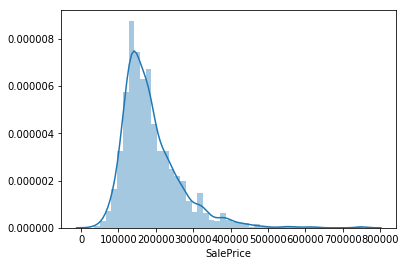

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(data.SalePrice)

In [22]:
data.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [23]:
data=pd.get_dummies(data,drop_first=True)
data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [24]:
data.corr()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
MSSubClass,1.000000,-0.135947,0.048354,-0.095558,5.569289e-02,0.038028,0.030343,-0.070532,-0.080376,-0.144281,-0.266309,-0.261439,0.307025,0.020084,0.066374,-0.012598,0.000197,0.112494,0.199645,-0.067505,0.232402,0.012318,-0.026748,0.080948,0.004504,-0.072267,-0.009566,-0.000793,-0.024113,-0.041122,-0.022291,0.010273,-0.021341,-0.017120,-0.022046,-0.081938,0.187905,0.019648,-0.341839,0.272905,...,0.049622,-0.003450,0.045589,-0.024580,-0.031232,-0.026547,-0.002730,-0.005379,0.002594,-0.005433,-0.148339,0.046528,0.086585,0.031940,0.088943,-0.033927,0.007980,-0.024958,0.063944,0.036987,-0.012893,0.013918,0.001171,0.029434,-0.016992,-0.021743,-0.003610,0.031687,0.031749,0.109189,1.181742e-02,0.026719,-0.048666,-0.023868,0.025102,-0.004021,0.009702,0.003490,0.042593,-0.054897
LotArea,-0.135947,1.000000,0.089923,-0.002274,-6.434044e-03,0.000296,0.096568,0.210654,0.109643,-0.012646,0.266749,0.291771,0.045928,0.009601,0.257563,0.160753,0.046054,0.119467,0.004086,0.122471,-0.003650,0.187835,0.264857,-0.026376,0.138179,0.167822,0.166350,0.083399,-0.013040,0.019162,0.038104,0.076822,0.040654,-0.002338,-0.013736,0.253724,-0.088994,-0.031162,0.198277,-0.164959,...,0.041826,-0.018187,-0.007500,-0.024208,-0.003519,0.024353,0.005359,0.061494,0.020427,-0.035928,0.104680,-0.003285,0.033948,0.009422,-0.138516,0.002903,-0.084731,-0.029084,0.004169,-0.005263,0.021593,-0.026516,-0.007924,-0.011286,0.031159,0.011589,-0.016645,-0.008931,-0.003640,0.002300,1.737971e-04,-0.012171,0.016396,-0.003603,-0.000092,-0.006755,0.019106,-0.013243,0.003161,0.018931
OverallQual,0.048354,0.089923,1.000000,-0.163995,5.710451e-01,0.549813,0.400317,0.201683,-0.084029,0.293295,0.506589,0.481512,0.276547,-0.017168,0.592530,0.087068,-0.065926,0.577596,0.249682,0.077386,-0.134452,0.439003,0.374143,0.546382,0.593238,0.532690,0.215901,0.312894,-0.118158,0.025694,0.043490,0.063842,-0.029645,0.065692,-0.016227,0.784687,0.165173,-0.052823,0.131005,-0.210647,...,0.208317,-0.117567,0.384423,-0.581550,-0.029901,-0.095515,-0.128197,-0.021733,-0.004661,0.147937,0.297570,-0.039434,0.189563,-0.097972,-0.389759,0.178798,-0.506670,-0.153615,0.037656,-0.031821,0.113547,-0.153792,-0.020893,-0.059057,0.159992,-0.088339,0.168002,0.031807,0.037008,-0.036648,2.152215e-02,0.011238,0.335466,-0.045753,-0.239226,-0.025207,-0.035066,-0.039499,-0.165791,0.330432
OverallCond,-0.095558,-0.002274,-0.163995,1.000000,-4.167616e-01,0.032668,-0.140793,-0.064234,0.035839,-0.161325,-0.230532,-0.149525,0.013108,0.042266,-0.097274,-0.073374,0.120553,-0.216676,-0.073151,0.021372,-0.079134,-0.065939,-0.035745,-0.337302,-0.250740,-0.204892,-0.011229,-0.061393,0.066920,0.024326,0.055036,-0.003160,0.077500,-0.010807,0.056867,-0.110242,-0.117021,-0.034439,-0.053876,0.154333,...,0.039409,0.007506,-0.024902,0.054259,-0.105890,0.016695,-0.003381,-0.026784,-0.014944,0.048785,-0.145686,-0.018843,-0.071190,-0.030045,0.214651,-0.110907,0.236858,0.054411,0.100053,

In [25]:
data.SalePrice.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [26]:
data.SalePrice.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1447, 1448, 1451, 1452, 1454, 1455, 1456, 1457, 1458, 1459],
           dtype='int64', length=1349)

In [28]:
X=data.drop("SalePrice",axis=1)
print(X.shape)
y=data.SalePrice.values.reshape(-1,1)
print(y.shape)

(1349, 226)
(1349, 1)


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)

In [31]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7217082599360986